# 104人力銀行網站爬蟲練習
## 從104人力銀行網站爬取求職公司資訊。

In [1]:
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 首先進入104人力銀行網站：https://www.104.com.tw/cust/list/index/
### 在"地區"及"產業"下拉式選單中，選擇你希望的選項，然後按下"找公司"按鈕。

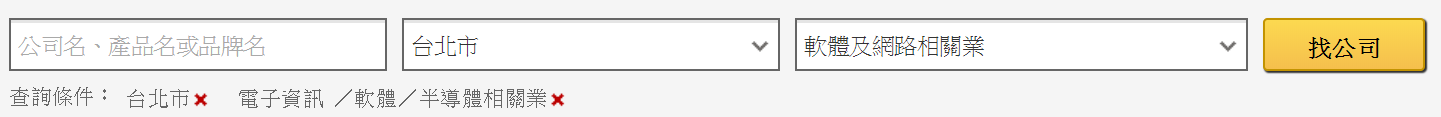

### 開啟新網頁後，觀察新的網址內容，把網址複製下來。

In [2]:
job_104_url = 'https://www.104.com.tw/cust/list/index/?page=1&order=1&mode=s&jobsource=checkc&area=6001005007,6001005008&indcat=1001003001'

### 開始爬取搜尋結果

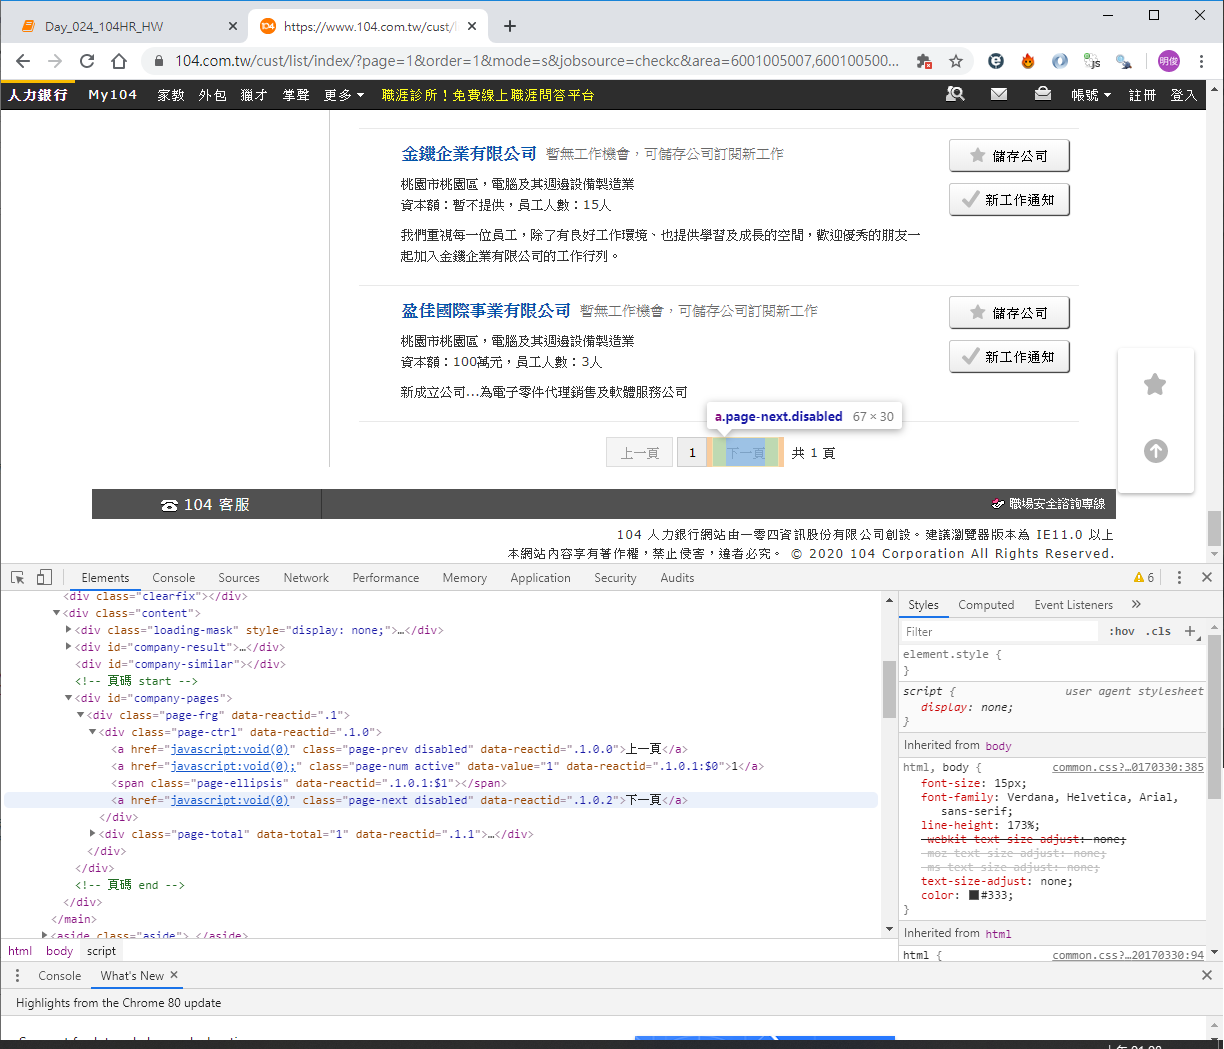

In [3]:
browser = webdriver.Chrome()
browser.get(job_104_url)  # 打開瀏覽器並連到網頁
time.sleep(2)  # delay一段時間等待網頁更新完成

while True:
    time.sleep(3)  # delay一段時間等待網頁更新完成
    html = browser.page_source
    soup = BeautifulSoup(html, 'lxml')
    company_list = soup.find("div", attrs={'id':"company-result"}).find_all("article", attrs={'class':"items"})
    
    #
    # 擷取公司名稱及簡介內容
    #
    for company in company_list:
        # 因為內容太多，我們把爬取到的結果，寫入"company_list.txt"檔案中，稍後再來檢視
        company_name = company.a.string
        f = open("company_list.txt", "a+", encoding='utf-8')
        f.write( company_name + "\n" )  # 寫入公司名稱
        
        company_desc = company.find("p", attrs={'class':"desc"})
        f.write( company_desc.string + "\n" )  # 寫入公司簡介
        f.write( "--------------------------------------------------------------------------------" + "\n" )
        f.close()

    '''
    
    接下來請學員練習，定位到「下一頁」按鈕。(可以利用find_element_by_link_text("xxx")的函式)
    如果還有下一頁，利用Selenium模擬click「下一頁」按鈕的動作。(定位到物件後，利用其click()屬性)
    若沒有下一頁了，離開爬取的流程
    
    Your code here
    
    '''
    button = browser.find_element_by_link_text("下一頁")
    button_status = button.get_attribute('class')
    if (button_status == "page-next disabled"):
        print('Done')
        break
    
    next_button.click()

browser.close()

Done
